In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
# Reading and Isolating training data

train_data = pd.read_csv("train.csv")
y_train = train_data['y']
x_train = train_data.drop('y',axis=1)

test_data = pd.read_csv("test.csv")
y_test = test_data['y']
x_test = test_data.drop('y',axis=1)


In [17]:
train_data.shape

(200, 21)

In [4]:
train_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.498041,0.499974,0.486934,0.503925,0.486312,0.509621,0.521303,0.474187,0.496608,0.495999,...,0.515182,0.490169,0.484779,0.508922,0.494168,0.523979,0.538038,0.481174,0.506464,0.485000
std,0.290505,0.299964,0.280694,0.275815,0.279856,0.291739,0.298430,0.282637,0.299148,0.296324,...,0.295530,0.291759,0.280981,0.295937,0.277480,0.286457,0.289818,0.300823,0.303508,0.501029
min,0.012829,0.001831,0.013058,0.005242,0.016070,0.001900,0.002696,0.001918,0.008000,0.001610,...,0.002918,0.001329,0.007932,0.010142,0.005772,0.000164,0.004205,0.002349,0.000832,0.000000
25%,0.261033,0.219562,0.262693,0.291828,0.248142,0.262402,0.251959,0.225290,0.236972,0.220512,...,0.256892,0.242523,0.240292,0.223012,0.261301,0.304945,0.296068,0.238197,0.258552,0.000000
50%,0.457044,0.525654,0.474085,0.550489,0.447308,0.489458,0.518531,0.463557,0.473829,0.508048,...,0.523639,0.505778,0.478916,0.516871,0.500100,0.524810,0.559933,0.466439,0.496910,0.000000
75%,0.764940,0.755385,0.717483,0.719201,0.744278,0.756452,0.791040,0.726464,0.758722,0.745760,...,0.760459,0.747383,0.733077,0.775362,0.715559,0.771494,0.794618,0.717173,0.760962,1.000000
max,0.987306,0.993529,0.996391,0.997734,0.997851,0.996152,0.984323,0.996079,0.996467,0.980638,...,0.998434,0.988843,0.988624,0.994804,0.999942,0.994148,0.997363,0.998004,0.999834,1.000000


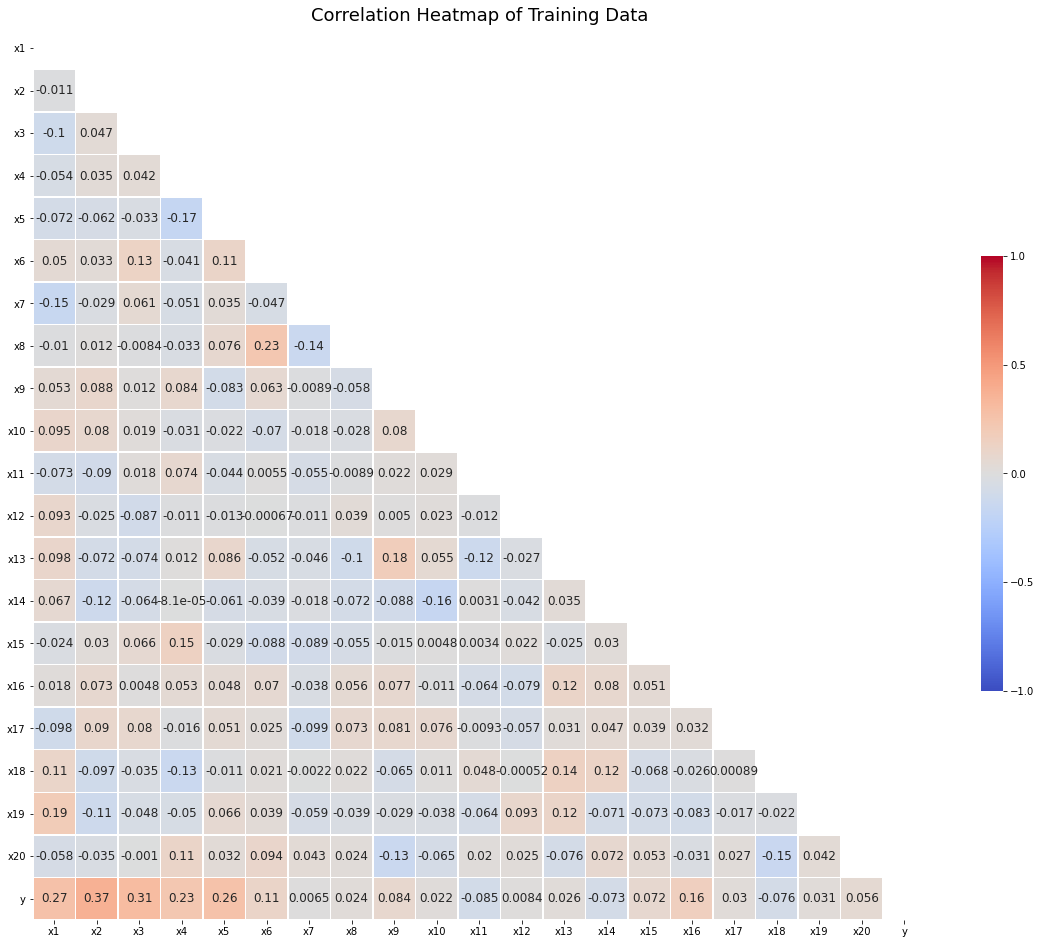

In [7]:
corr_matrix = train_data.corr()
mask = np.zeros_like(corr_matrix,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -0.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
ax.set_title("Correlation Heatmap of Training Data",fontsize=18)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
f.savefig('correlation.jpg')

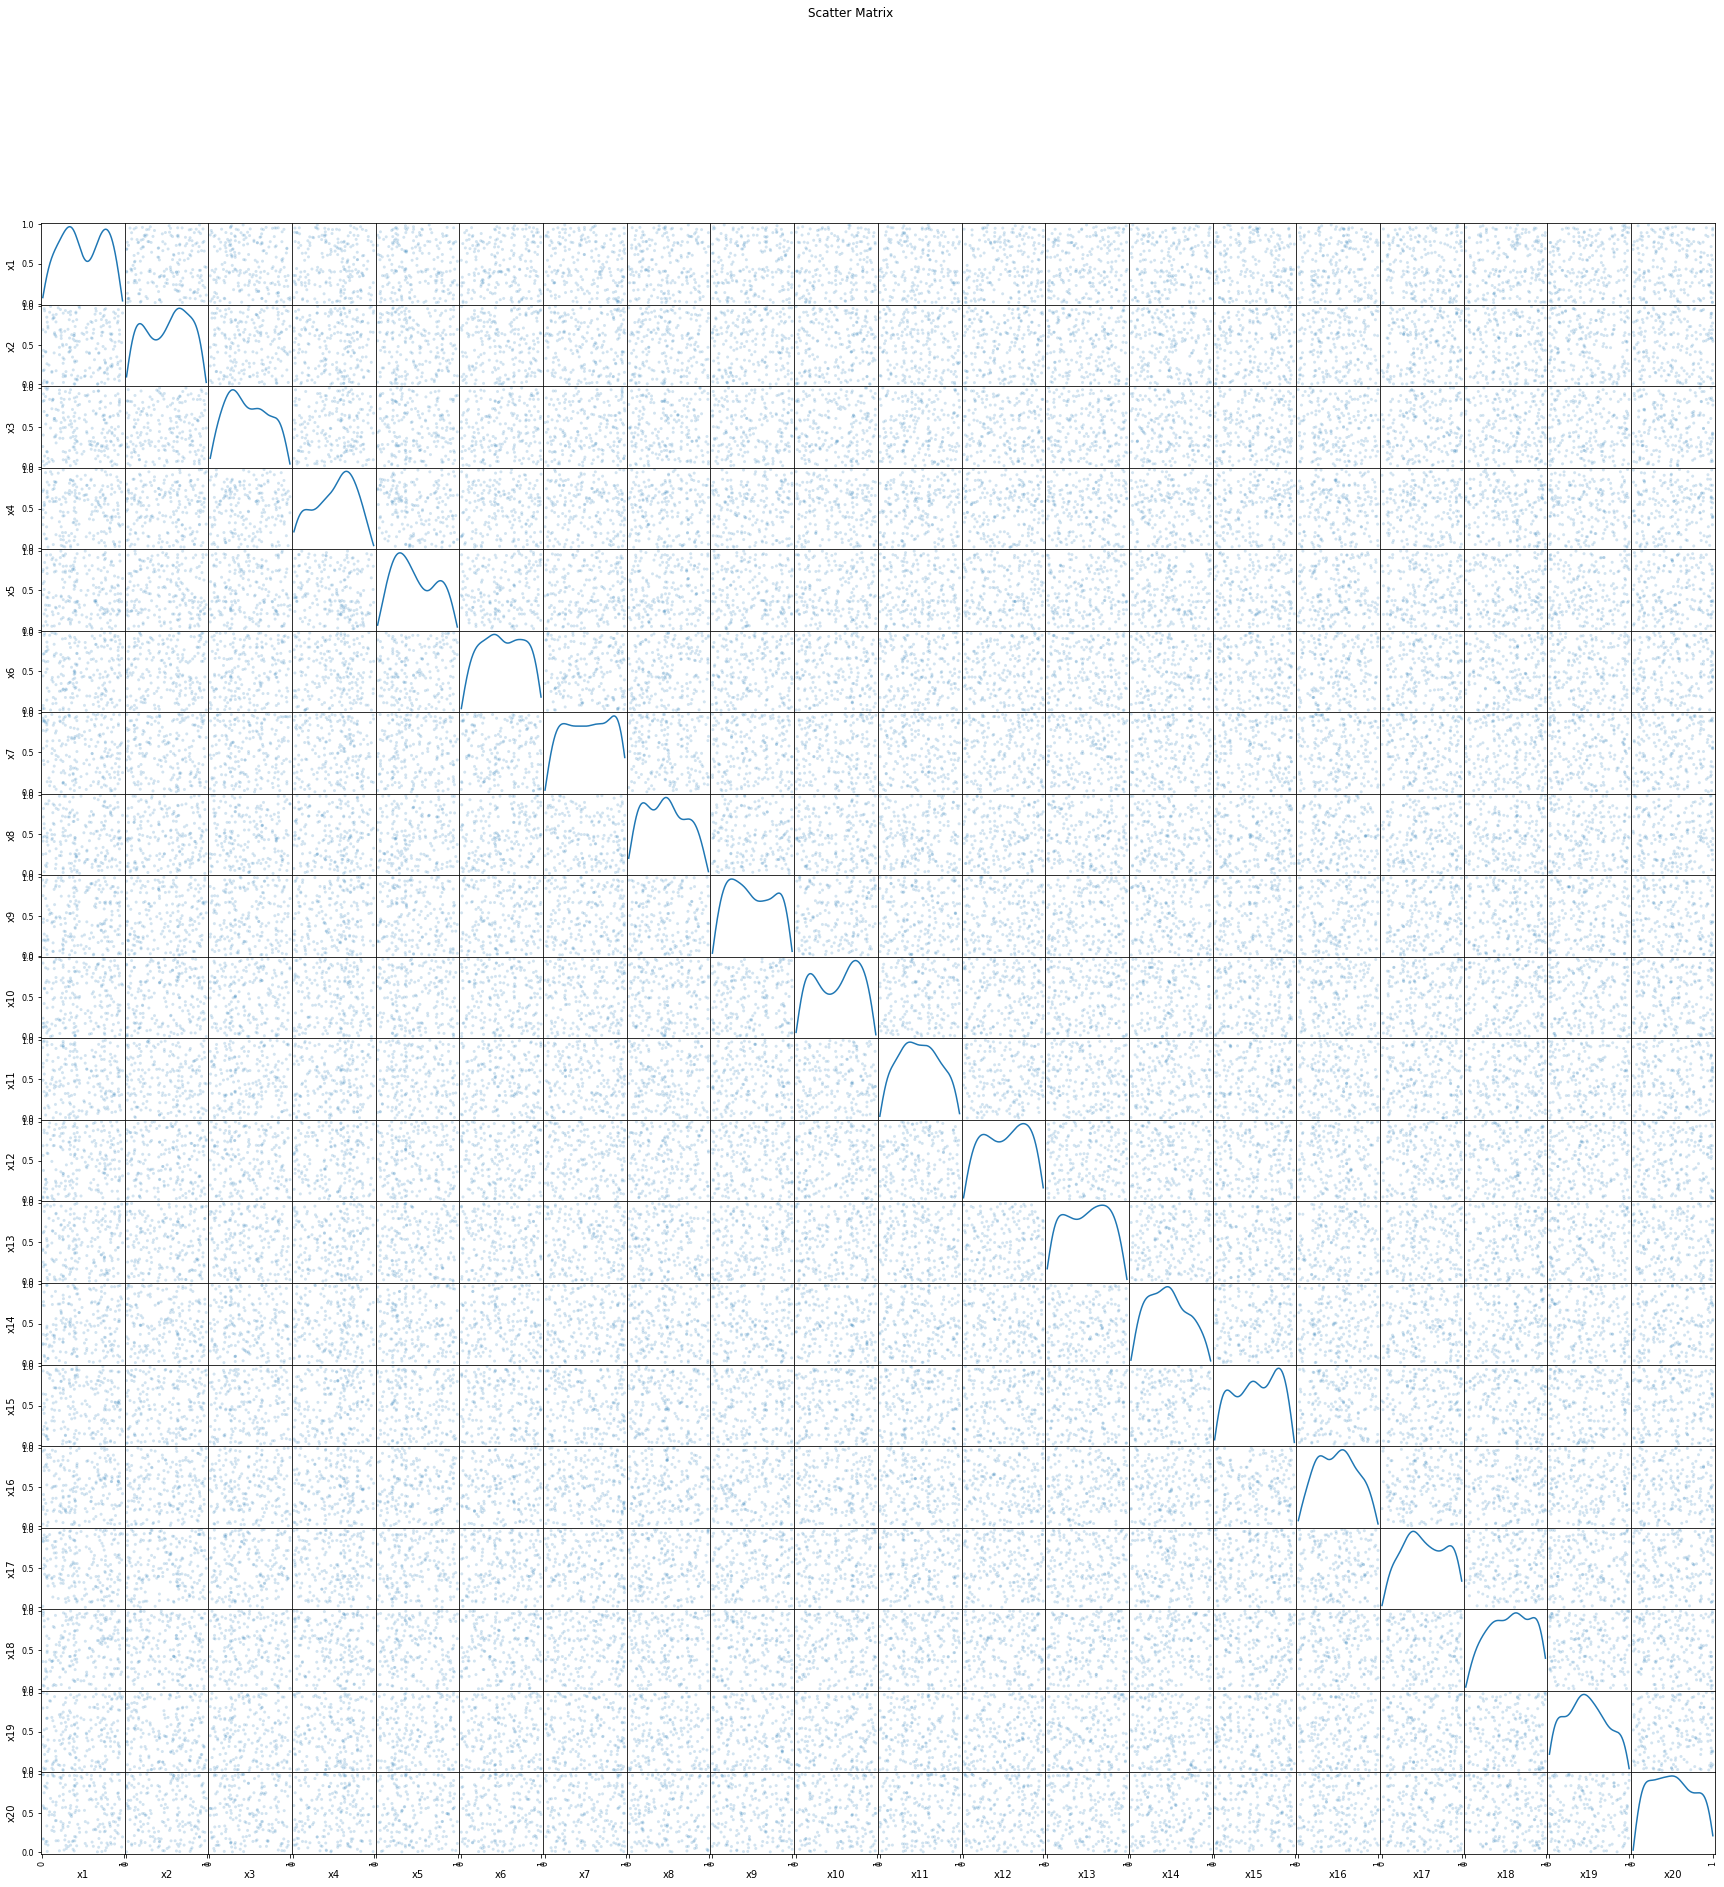

In [15]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(x_train, alpha=0.2, figsize=(30, 30), diagonal='kde')
plt.suptitle('Scatter Matrix')
plt.savefig("scatter_matrix.png")

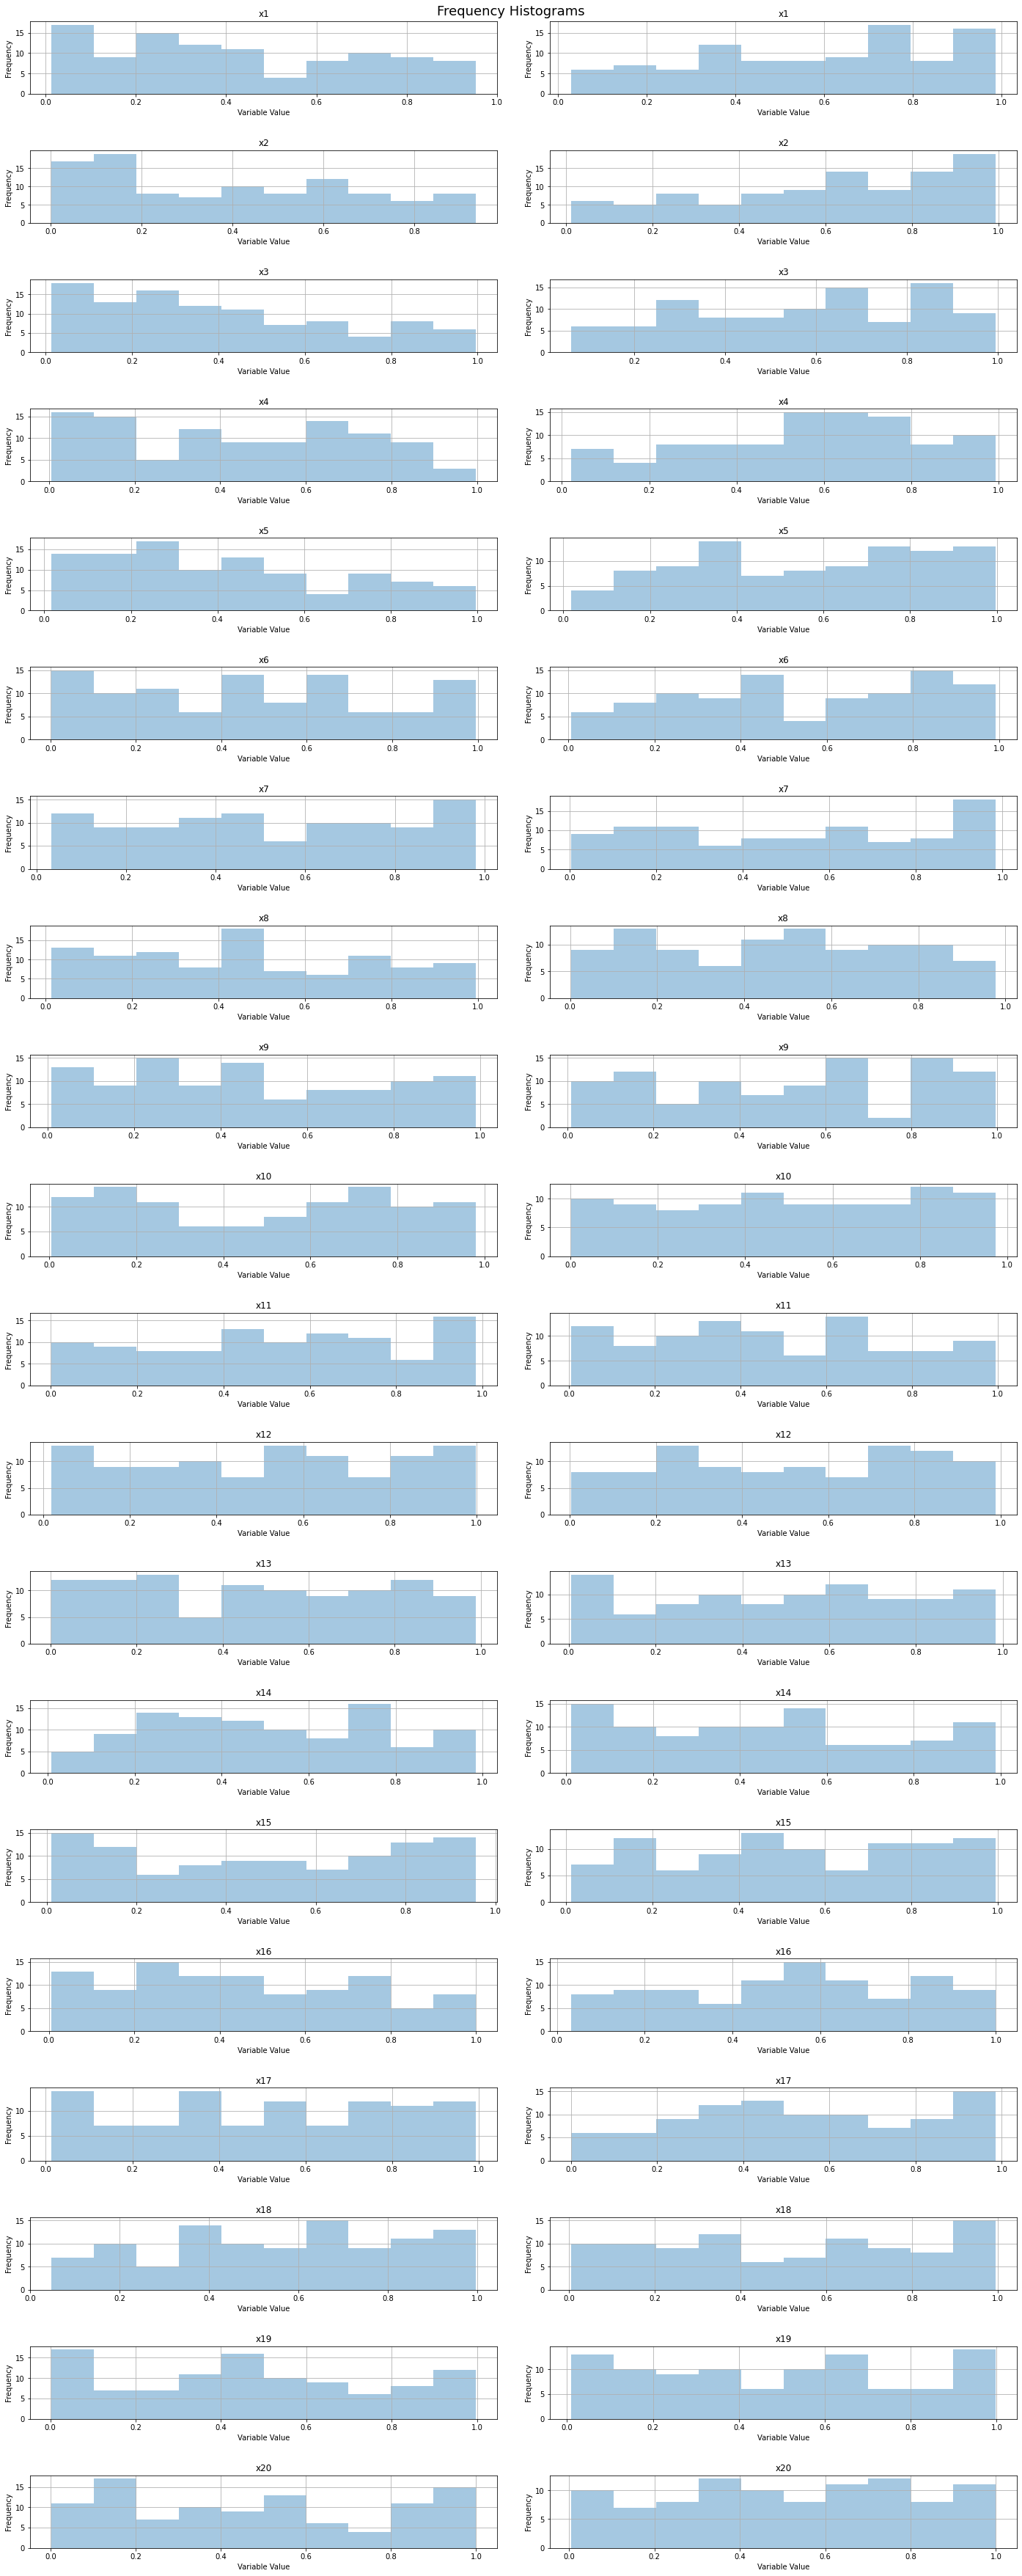

In [14]:
grouped = train_data.groupby('y')
group_1 = grouped.get_group(1)
group_0 = grouped.get_group(0)
cols = group_0.columns

fig, axes = plt.subplots(20,2,figsize=(20,50))
for i in range(20):
    group_0.hist(column=cols[i],alpha=0.4,ax=axes[i,0])
    axes[i,0].set_xlabel("Variable Value")
    axes[i,0].set_ylabel("Frequency")
    group_1.hist(column=cols[i],alpha=0.4,ax=axes[i,1])
    axes[i,1].set_xlabel("Variable Value")
    axes[i,1].set_ylabel("Frequency")
fig.suptitle("Frequency Histograms",fontsize=18)
plt.tight_layout(pad=3.0)
fig.savefig('Frequency Histogram - Features')
#group_0.hist(column=cols[20],alpha=0.4,figsize=(20,20))

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

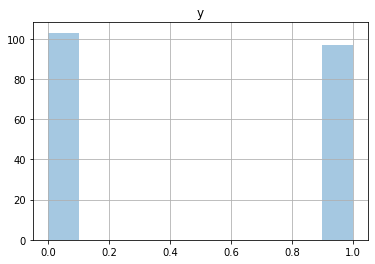

In [6]:
#train_data.hist(column=cols[20],alpha=0.4)

In [7]:
# Not required 

# scaler = StandardScaler()

# # Fit on training set only.
# scaler.fit(x_train)

# # Apply transform to both the training set and the test set.
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [11]:
x_test.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.495153,0.500056,0.491728,0.504388,0.501449,0.510859,0.499111,0.499789,0.511107,0.501927,0.513570,0.486455,0.503855,0.506590,0.504942,0.512467,0.506835,0.497698,0.500266,0.482093
std,0.287108,0.294476,0.292275,0.291892,0.291481,0.284895,0.291767,0.294749,0.281148,0.284952,0.286963,0.285706,0.290734,0.283919,0.294669,0.287014,0.290112,0.286409,0.289756,0.293268
min,0.000283,0.003648,0.000748,0.000874,0.000291,0.001817,0.000616,0.000363,0.004938,0.000678,0.001154,0.000263,0.002237,0.000833,0.002980,0.000852,0.002042,0.000326,0.000462,0.002602
25%,0.245948,0.233514,0.236515,0.249161,0.256251,0.262003,0.248092,0.239292,0.270200,0.259476,0.260987,0.236074,0.256029,0.276630,0.242034,0.261431,0.258984,0.256604,0.240435,0.228606
50%,0.496294,0.514999,0.487837,0.500808,0.502172,0.519435,0.501875,0.506565,0.522126,0.497635,0.521044,0.493705,0.494866,0.510860,0.487568,0.518020,0.508237,0.496482,0.492288,0.458068
75%,0.739329,0.758633,0.756625,0.763834,0.747002,0.766688,0.746730,0.773151,0.744210,0.748600,0.769909,0.721953,0.747041,0.742878,0.771552,0.763300,0.756067,0.738062,0.752507,0.733377
max,0.999754,0.999933,0.999266,0.999861,0.998642,0.999680,0.999016,0.998497,0.999705,0.999685,0.998845,0.998012,0.999923,0.999945,0.999967,0.999833,0.999999,0.999955,0.997828,0.996846


In [38]:
x_train.shape

(200, 20)

Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       491
           1       0.85      0.81      0.83       509

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

ROC Score: 0.8323416787039
Time Taken: 0.005202293395996094



Random Forest
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       491
           1       0.79      0.73      0.76       509

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000

ROC Score: 0.7666083811154815
Time Taken: 0.13007450103759766



K Neighbouts Classifier
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       491
           1       0.67      0.68      0.67       5

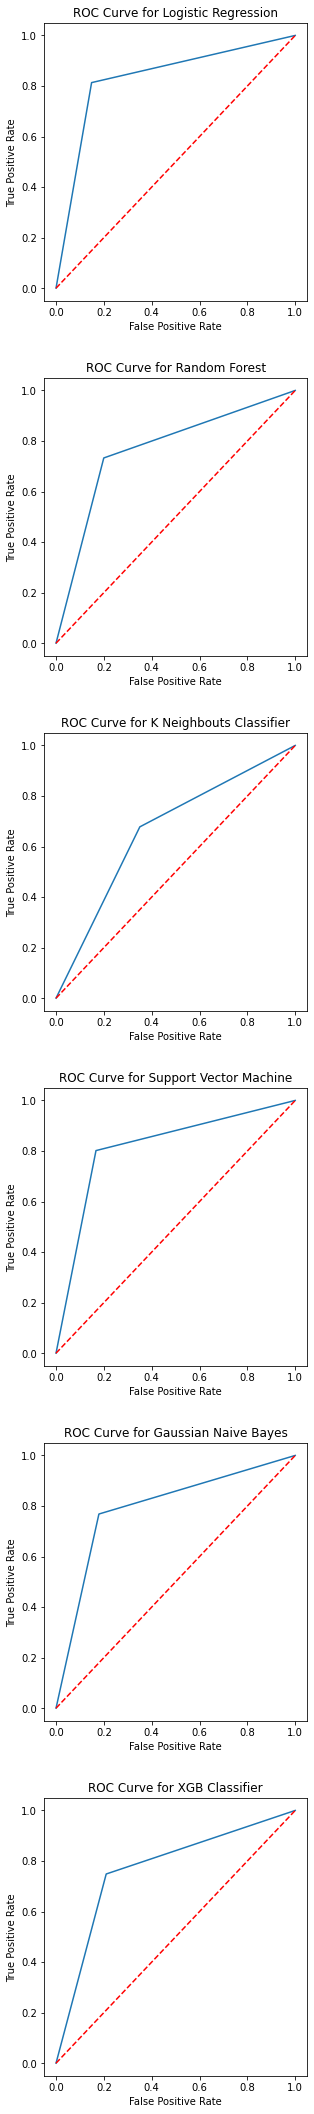

In [9]:
models = [
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('K Neighbouts Classifier', KNeighborsClassifier()),
          ('Support Vector Machine', SVC()), 
          ('Gaussian Naive Bayes', GaussianNB()),
          ('XGB Classifier', XGBClassifier())
        ]

fig, ax = plt.subplots(6,1,figsize=(5,30))

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_labels = ['0','1']
i = 0

for name, model in models:
    start = time.time()
    clf = model.fit(x_train, y_train)
    end = time.time()
    y_pred = clf.predict(x_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    ax[i].plot(fpr,tpr,label=name)
    ax[i].plot([0, 1], [0, 1],'r--')
    ax[i].set_title("ROC Curve for "+name)
    ax[i].set_xlabel("False Positive Rate")
    ax[i].set_ylabel("True Positive Rate")
    i += 1
    
    print(name)
    print(classification_report(y_test, y_pred))
    print("ROC Score: "+str(auc))
    print("Time Taken: "+str(end-start))
    #print(pd.DataFrame(data=model_confusion, index=target_labels, columns=target_labels))
    print("\n\n")
plt.tight_layout(pad=3.0)
fig.savefig("Benchmark ROCs")

In [14]:
type(x_train)

pandas.core.frame.DataFrame

In [3]:
n_components = [5,10,15,20]
#benchmark_cols = ['Variance retained','n_Components','Time(s)','Accuracy_percentage']
#benchmark = pd.DataFrame(columns = benchmark_cols)
 
## NO use     

'''scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
'''
x_train_pca = x_train
x_test_pca = x_test

#fig, ax = plt.subplots(4,1,figsize=(5,20))
#i = 0
print("Logistic Regression")
for n_component in n_components:
    pca = PCA(n_components=n_component)
    pca.fit(x_train_pca)
    #n_components = pca.n_components_
    x_train_pca = pca.transform(x_train_pca)
    x_test_pca = pca.transform(x_test_pca)
    #model = LogisticRegressionCV(cv=5, random_state=0,)
    model = LogisticRegression(penalty='l2',solver='liblinear')
    start = time.time()
    model.fit(x_train_pca, y_train)
    end =  time.time()
    timing = end-start   

    y_pred = model.predict(x_test_pca)

    #fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    #ax[i].plot(fpr,tpr,label=n_component)
    #ax[i].plot([0, 1], [0, 1],'r--')
    #ax[i].set_title("ROC Curve for "+str(n_component)+" Components")
    #ax[i].set_xlabel("False Positive Rate")
    #ax[i].set_ylabel("True Positive Rate")
    #i += 1
    
    print("Number of Components: "+str(n_component))
    print("Time Taken: "+str(timing))
    print("ROC Score: "+str(auc))
    print(classification_report(y_test, y_pred))
    print("\n\n")
    #return 
    #a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
    #benchmark = benchmark.append(a,ignore_index=True)
    x_train_pca = x_train
    x_test_pca = x_test
#plt.tight_layout(pad=3.0)
#fig.savefig("Principal Components ROCs")
# print("Support Vector Machine")
# for n_component in n_components:
#     pca = PCA(n_components=n_component)
#     pca.fit(x_train_pca)
#     #n_components = pca.n_components_
#     x_train_pca = pca.transform(x_train_pca)
#     x_test_pca = pca.transform(x_test_pca)
#     model = SVC()
#     start = time.time()
#     model.fit(x_train_pca, y_train)
#     end =  time.time()
#     timing = end-start   

#     # Predict for Multiple Observations (images) at Once
#     y_pred = model.predict(x_test_pca)   

#     # generate evaluation metrics
#     accuracy = (metrics.accuracy_score(y_test, y_pred))
    
#     print("Number of Components: "+str(n_component))
#     print("Time Taken: "+str(timing))
#     print(classification_report(y_test, y_pred))
#     print("\n\n")
#     #return 
#     #a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
#     #benchmark = benchmark.append(a,ignore_index=True)
#     x_train_pca = x_train
#     x_test_pca = x_test


Logistic Regression
Number of Components: 5
Time Taken: 0.0009968280792236328
ROC Score: 0.5992841680704548
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       491
           1       0.61      0.58      0.60       509

    accuracy                           0.60      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.60      0.60      0.60      1000




Number of Components: 10
Time Taken: 0.001001596450805664
ROC Score: 0.6292218678851949
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       491
           1       0.64      0.62      0.63       509

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.63      0.63      0.63      1000




Number of Components: 15
Time Taken: 0.0009982585906982422
ROC Score: 0.6740744001056342
              precision    recall  f1-score   support



In [8]:
abs(corr_matrix['y']).nlargest(11)
#x_train.columns

y      1.000000
x2     0.370205
x3     0.309064
x1     0.270116
x5     0.264926
x4     0.229545
x16    0.162416
x6     0.112589
x11    0.084693
x9     0.084416
x18    0.075595
Name: y, dtype: float64

In [71]:
abs(corr_matrix['y']).nsmallest(10)

x7     0.006530
x12    0.008408
x10    0.021720
x8     0.024069
x13    0.025738
x17    0.030045
x19    0.030850
x20    0.056275
x15    0.072153
x14    0.072633
Name: y, dtype: float64

Logistic Regression
ROC Score: 0.8721745845653991
Time Taken: 0.396618127822876
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       491
           1       0.88      0.86      0.87       509

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000




LRCV
ROC Score: 0.8801051540699186
Time Taken: 0.06083345413208008
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       491
           1       0.89      0.87      0.88       509

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000






c:\users\richeek awasthi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


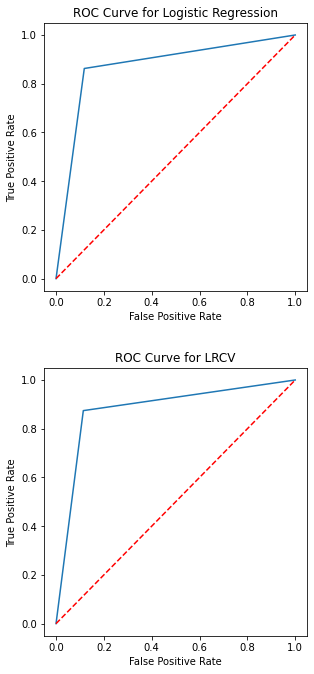

In [10]:


## This is the main model 

relv_feats = x_train.columns
relv_feats = [feat for feat in relv_feats if feat not in ['x7','x8','x13','x12','x10']]

relv_feats = ['x1','x2','x3','x4','x5']

x_train_drop = x_train[relv_feats]
x_test_drop = x_test[relv_feats]

models = [
          ('Logistic Regression', LogisticRegression()), 
   ('LRCV', LogisticRegressionCV(cv=5,penalty='elasticnet',solver='saga',random_state=0,l1_ratios=[0.75]))
          
        ]

fig, ax = plt.subplots(2,1,figsize=(5,10))

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_labels = ['0','1']
i = 0

for name, model in models:
    start = time.time()
    clf = model.fit(x_train_drop, y_train)
    end = time.time()
    y_pred = clf.predict(x_test_drop)
    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    ax[i].plot(fpr,tpr,label=name)
    ax[i].set_title("ROC Curve for "+name)
    ax[i].plot([0, 1], [0, 1],'r--')
    ax[i].set_xlabel("False Positive Rate")
    ax[i].set_ylabel("True Positive Rate")
    i += 1
    
    print(name)
    print("ROC Score: "+str(auc))
    print("Time Taken: "+str(end-start))
    print(classification_report(y_test, y_pred))
    #print(pd.DataFrame(data=model_confusion, index=target_labels, columns=target_labels))
    print("\n\n")
plt.tight_layout(pad=3.0)
fig.savefig("Manual Feat ROC")

In [29]:
model = LogisticRegressionCV(cv=5, random_state=0)
model.fit(x_train_drop,y_train)
mythresholds = np.linspace(0,1,50)
for threshold in mythresholds:
    y_pred_onehot = (model.predict_proba(x_test_drop) >= mythreshold).astype(int)
    y_pred = []
    for i in range(y_pred_onehot.shape[0]):
        if(y_pred_onehot[i][0]==1):
            y_pred.append(0)
        else:
            y_pred.append(1)
    y_pred = np.array(y_pred)
    print("Threshold: "+str(threshold))
    print(classification_report(y_test,y_pred))

Threshold: 0.0
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       491
           1       0.79      0.90      0.84       509

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

Threshold: 0.02040816326530612
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       491
           1       0.79      0.90      0.84       509

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

Threshold: 0.04081632653061224
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       491
           1       0.79      0.90      0.84       509

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      10